## [Allstate Claims Severity](https://goo.gl/1DwHVy) -- Predictions using machine learning:

### Author: Dr. Rahul Remanan, CEO and  Chief Imagination Officer [Moad Computer](https://www.moad.computer)

The [Allstate Corporation](https://en.wikipedia.org/wiki/Allstate) is the one of the largest insurance providers in the United States and one of the largest that is publicly held. The company also has personal lines insurance operations in Canada. Allstate was founded in 1931 as part of Sears, Roebuck and Co., and was spun off in 1993.[1](https://goo.gl/ce2JJ2) The company has had its headquarters in Northfield Township, Illinois, near Northbrook since 1967.[2](https://goo.gl/oX4kfZ),[3](https://goo.gl/mcTd3y)

As part of Allstate's ongoing efforts to develop automated methods of predicting the cost, and hence severity, of claims, they releasd a claims severity assessment dataset on Kaggle.[4](https://goo.gl/1DwHVy) In this challenge, datascientists were invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. The goal of this challenge was to help aspiring competitors demonstrate their insight into better ways of predicting claims severity.

We will be using this dataset to build a machine learning model using gradient boosting.

## Part 02 -- Machine learning prediction using [Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting):

In [1]:
library('ggplot2')
library('caret')
library('dplyr')

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
trainRAW <- read.csv("./data/train.csv", na.strings = c("", "NA"))
testRAW <- read.csv("./data/test.csv")

In [3]:
summary(trainRAW)

       id         cat1       cat2       cat3       cat4       cat5      
 Min.   :     1   A:141550   A:106721   A:177993   A:128395   A:123737  
 1st Qu.:147748   B: 46768   B: 81597   B: 10325   B: 59923   B: 64581  
 Median :294540                                                         
 Mean   :294136                                                         
 3rd Qu.:440680                                                         
 Max.   :587633                                                         
                                                                        
 cat6       cat7       cat8       cat9       cat10      cat11      cat12     
 A:131693   A:183744   A:177274   A:113122   A:160213   A:168186   A:159825  
 B: 56625   B:  4574   B: 11044   B: 75196   B: 28105   B: 20132   B: 28493  
                                                                             
                                                                             
                          

### Generating histogram plot:

The numeric attributes are already between [0,1]:

[1] 0

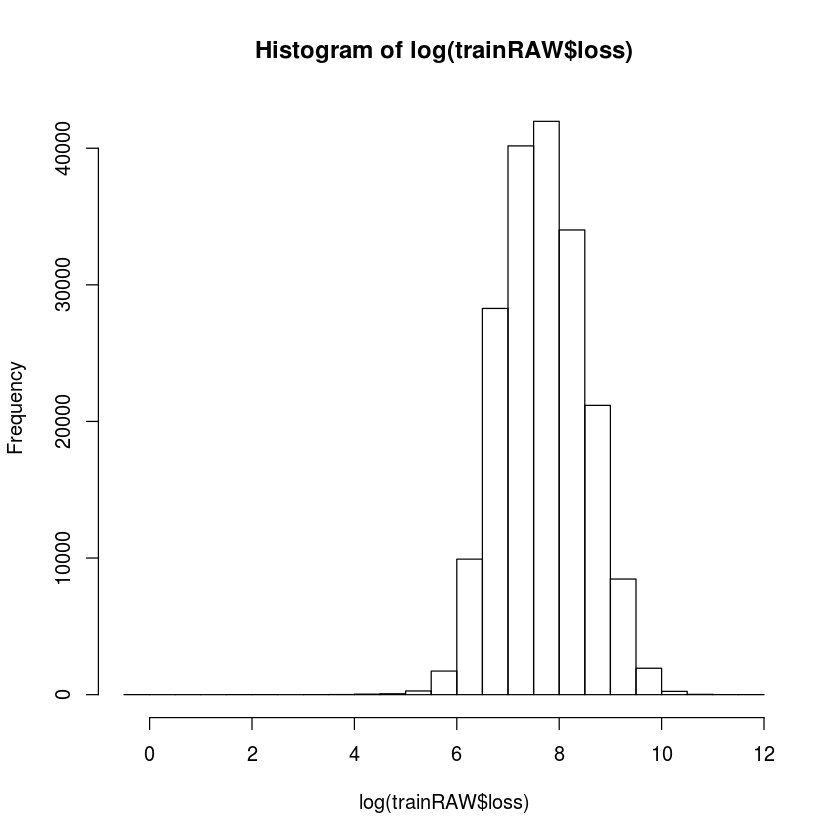

In [4]:
sum(is.na(trainRAW))
hist(log(trainRAW$loss))

### Data cleaning-up:

Removing columns that nlevels_train data is different from the nlevels_test data and removing columns that have nlevels > 5

In [5]:
cols <- rep(TRUE, length(names(testRAW)))
for (i in 1:length(names(testRAW))){
    if (class(testRAW[[i]]) == "factor"){
        if (!isTRUE(all.equal(levels(trainRAW[[i]]), levels(testRAW[[i]]))) | nlevels(testRAW[[i]]) > 5){
            cols[i] <- FALSE  
        } 
    }
}

In [6]:
trainMOD <- trainRAW[,cols]
testMOD <- testRAW[,cols]

### Creating dummies:

In [7]:
dummies <- dummyVars( ~., data = testMOD)

In [8]:
trainDUM <- data.frame((predict(dummies, newdata = trainMOD)), loss = trainMOD$loss)

In [9]:
testDUM <- data.frame((predict(dummies, newdata = testMOD)))

In [10]:
rm(dummies)
rm(trainMOD)
rm(testMOD)

### Check for NearZeroValues:

In [11]:
nz <- nearZeroVar(trainDUM, saveMetrics = TRUE)
nznames <- rownames(nz[nz$nzv == TRUE,])
trainNZ <- trainDUM[,!(names(trainDUM) %in% nznames)]
testNZ <- testDUM[,!(names(testDUM) %in% nznames)]
trainNZ$loss <- log(trainNZ$loss)

In [12]:
rm(trainDUM)
rm(testDUM)

In [13]:
gc()
gc(TRUE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2066823,110.4,3886542,207.6,2633769,140.7
Vcells,56183593,428.7,221820108,1692.4,277240287,2115.2


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2068635,110.5,3886542,207.6,2633769,140.7
Vcells,56186800,428.7,177456086,1353.9,277240287,2115.2


### Implementing a prediction algorith using [Gradient Boosting (GBM)](https://en.wikipedia.org/wiki/Gradient_boosting):

In [14]:
inTrain <- createDataPartition(y=trainRAW$loss, p=0.7, list = FALSE)

In [15]:
rm (trainRAW)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2073930,110.8,3886542,207.6,2633769,140.7
Vcells,42420136,323.7,141964868,1083.2,277240287,2115.2


In [16]:
trainingGBM <- trainNZ[inTrain,]
testingGBM <- trainNZ[-inTrain,]

In [17]:
modfit <- train(loss ~., method = "gbm", data = trainingGBM, verbose = TRUE)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        0.6296            -nan     0.1000    0.0283
     2        0.6065            -nan     0.1000    0.0230
     3        0.5876            -nan     0.1000    0.0188
     4        0.5723            -nan     0.1000    0.0152
     5        0.5597            -nan     0.1000    0.0127
     6        0.5484            -nan     0.1000    0.0111
     7        0.5383            -nan     0.1000    0.0100
     8        0.5297            -nan     0.1000    0.0085
     9        0.5222            -nan     0.1000    0.0076
    10        0.5150            -nan     0.1000    0.0074
    20        0.4714            -nan     0.1000    0.0032
    40        0.4362            -nan     0.1000    0.0011
    60        0.4169            -nan     0.1000    0.0008
    80        0.4029            -nan     0.1000    0.0005
   100        0.3921            -nan     0.1000    0.0005
   120        0.3836            -nan     0.1000    0.0003
   140        

In [18]:
prediction <- predict(modfit, testingGBM)

### Generating predictions formatted for Kaggle submission:

In [19]:
prediction.test <- exp(predict(modfit, testNZ))
predictionDF <- data.frame(id = testRAW$id, loss = prediction.test)
write.csv(predictionDF, file = '../output/prediction_test_GBM.csv', row.names = F)

In [20]:
rm(modfit)
rm(testNZ)
rm(testRAW)

In [21]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2114021,113.0,3886542,207.6,3886542,207.6
Vcells,39979007,305.1,188676984,1439.5,294806693,2249.2


### Generate loss function plot:

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.268056 -0.046611 -0.001087  0.006551  0.051389  1.505312 

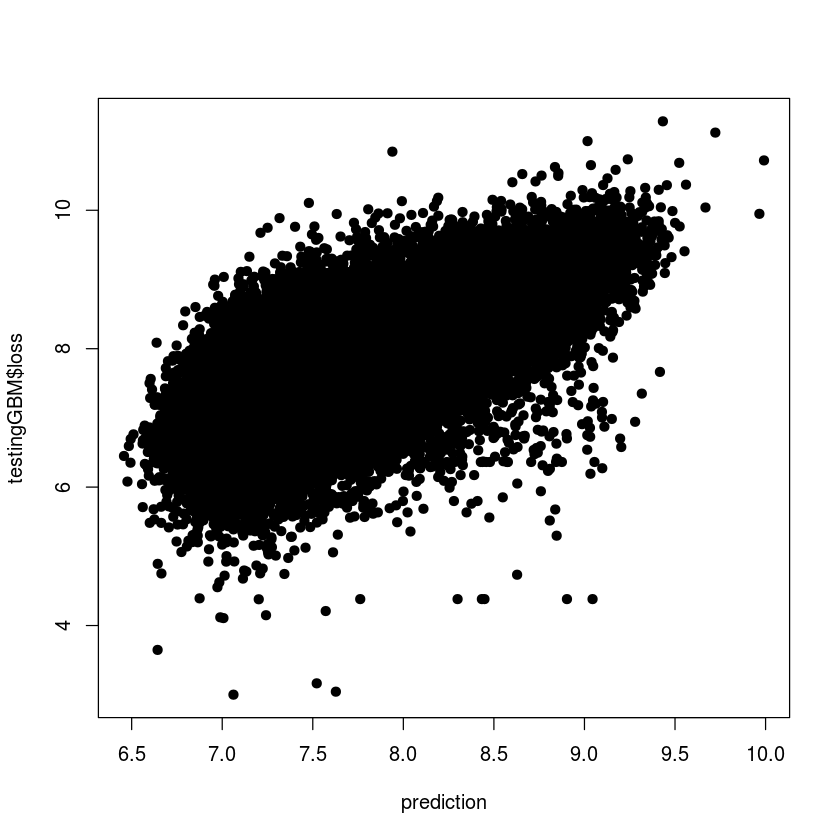

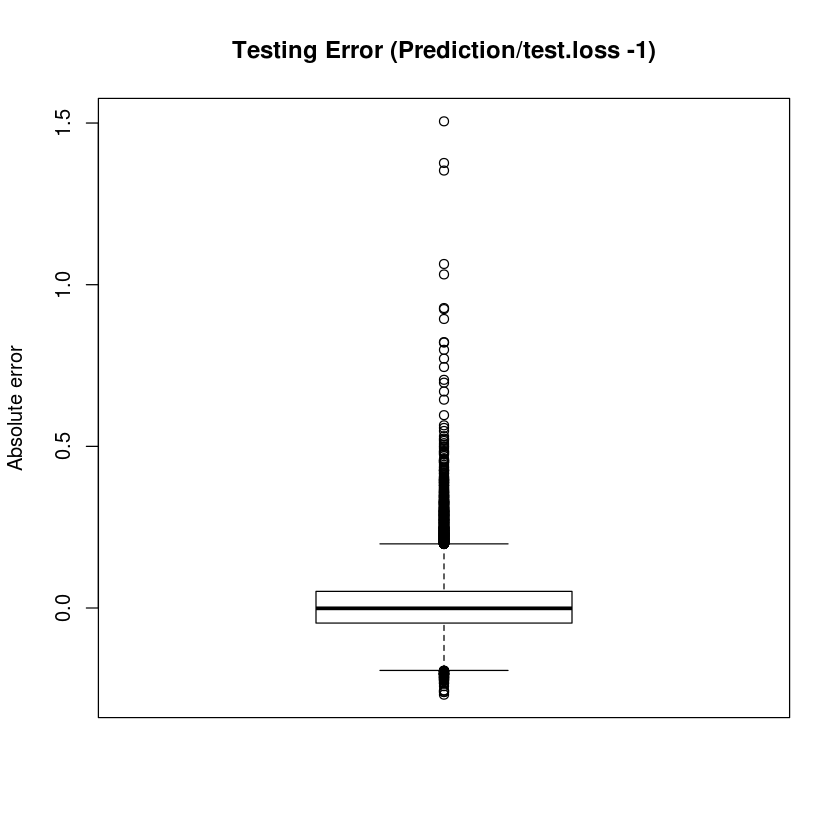

In [22]:
plot(prediction, testingGBM$loss, pch = 19)
error <- prediction/testingGBM$loss - 1
summary(error)
boxplot(error, main = "Testing Error (Prediction/test.loss -1)", ylab = "Absolute error")